In [10]:
import numpy as np
from Bio.SeqIO.FastaIO import SimpleFastaParser
from Bio.pairwise2 import format_alignment
from Bio import pairwise2
from tqdm import tqdm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl

In [11]:
finish = np.loadtxt('to_tsne.mat')
finish.shape

(688, 688)

In [16]:
aav_labels = np.zeros(64)
dependo_labels = np.ones(614)
biocad_10 = np.array([i for i in range(2, 12)])
aav_labels_10_interested = np.concatenate((aav_labels, dependo_labels, biocad_10))

In [46]:
finished = TSNE(n_components = 2, learning_rate = 'auto', n_iter = 5000, perplexity = 40).fit_transform(finish)

/Users/evgeny/.conda/envs/code/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


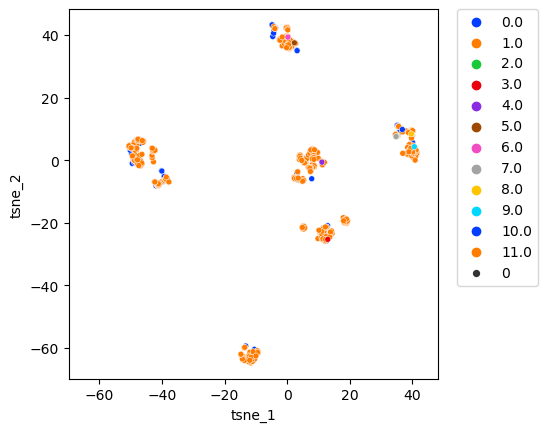

In [47]:
tsne_result_df = pd.DataFrame({'tsne_1': finished[:,0], 'tsne_2': finished[:,1], 'label': aav_labels_10_interested})
fig, ax = plt.subplots(1)
mpl.style.use('default')
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, size = 0, ax=ax,s=120, palette = "bright")
lim = (finished.min()-5, finished.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)